In [43]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

In [44]:
x_train, y_train= load_data_multi()

Standard Scaler is used to scale the input features


In [45]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_transform=sc.fit_transform(x_train)

Initializing the parameters for this algorithm

In [46]:
weight_vector=np.random.randn(x_train.shape[1])
intercept=0
learning_rate = 0.001


Same compute cost function with an addition of another weight w2. Here weight vector is used that has two weights w1 and w2 while b is the bias.

In [47]:
import numpy as np

def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m, n) Input to the model 
        y (ndarray): Shape (m,) Label
        w1, w2, b (float): Parameters of the model
    
    Returns:
        total_cost (float): The cost of using w, b as the parameters for linear regression
                           to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    # Compute predictions
    predictions = w[0] * x[:, 0] + w[1] * x[:, 1] + b
    
    # Compute squared error
    squared_error = (predictions - y) ** 2
    
    # Compute total cost
    total_cost = (np.mean(squared_error))
    
    return total_cost


In [68]:
cost = compute_cost(X_transform, y_train, weight_vector,intercept)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

<class 'numpy.float64'>
Cost at initial w: 131183125428.865


Same gradient function with an addition of another derivative that is used here as dj_dw2. 

In [49]:
# UNQ_C2
# GRADED FUNCTION: compute_gradient
def compute_gradient(x, y, w1, w2, b): 
    """
    Computes the gradient for linear regression 
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w1, w2, b (scalar): Parameters of the model  
    Returns:
        dj_dw1 (scalar): The gradient of the cost w.r.t. the parameter w1
        dj_dw2 (scalar): The gradient of the cost w.r.t. the parameter w2
        dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
    """
    
    # Number of training examples
    m = x.shape[0]
    
    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0
    
    ### START CODE HERE ###
    predictions = (w1 * x[:, 0]) + (w2 * x[:, 1]) + b  # Compute predictions for all examples
    dj_db = predictions - y  # Compute gradient for parameter 'b'
    dj_dw1 = np.dot(dj_db, (x[:, 0]))  # Compute gradient for parameter 'w1'
    dj_dw2 = np.dot(dj_db, x[:, 1])  # Compute gradient for parameter 'w2'
    dj_db = np.sum(dj_db) / m  # Compute total gradient update for parameter 'b'
    dj_dw1 = np.sum(dj_dw1) / m  # Compute total gradient update for parameter 'w1'
    dj_dw2 = np.sum(dj_dw2) / m  # Compute total gradient update for parameter 'w2'
    ### END CODE HERE ### 
        
    return dj_dw1, dj_dw2, dj_db


Finding the gradient at the the initial values

In [50]:
tmp_dj_dw1,tmp_dj_dw2, tmp_dj_db = compute_gradient(X_transform, y_train, weight_vector[0],weight_vector[1], intercept)
print('Gradient at initial w, b (zeros):', tmp_dj_dw1,tmp_dj_dw2, tmp_dj_db)

Gradient at initial w, b (zeros): -105763.46258224433 -54708.69608350729 -340412.6595744681


Now running the epoch of 1500 iterations where the gradient is calculated and weights are updated respectively. Cost and iterations are recorded for plotting purposes.

In [51]:
def gradient_descent(x, y, w1_in,w2_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w1 = copy.deepcopy(w1_in)  #avoid modifying global w within function
    w2= copy.deepcopy(w2_in)  #avoid modifying global w within function

    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw1,dj_dw2, dj_db = gradient_function(x, y, w1,w2, b )  

        # Update Parameters using w, b, alpha and gradient
        #_________your code here_________
        ### START CODE HERE ###
        w1 = w1 - alpha * dj_dw1
        w2 = w2 - alpha * dj_dw2
        b = b - alpha * dj_db

        ### END CODE HERE ###
                   

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y,[w1,w2], b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w1)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w1,w2, b, J_history, w_history #return w and J,w history for graphing

In [69]:
iterations = 1500

alpha = 0.015


w1,w2,b,J_history,_ = gradient_descent(X_transform ,y_train, weight_vector[0], weight_vector[1],intercept,
                     compute_cost, compute_gradient, alpha, iterations)
print("w1,w2,b found by gradient descent:", w1,w2, b)

Iteration    0: Cost 127312049026.33   
Iteration  150: Cost 5701025151.38   
Iteration  300: Cost 4154502691.34   
Iteration  450: Cost 4094239083.26   
Iteration  600: Cost 4087595649.79   
Iteration  750: Cost 4086701933.38   
Iteration  900: Cost 4086579550.85   
Iteration 1050: Cost 4086562768.62   
Iteration 1200: Cost 4086560467.03   
Iteration 1350: Cost 4086560151.38   
w1,w2,b found by gradient descent: 109444.98173927338 -6575.540123792891 340412.6595258999


Plotting the learning curve that is made on the basis of iterations and cost recorded above. Also, the curve suggests that as the number of iterations increase the cost gradually decreases.

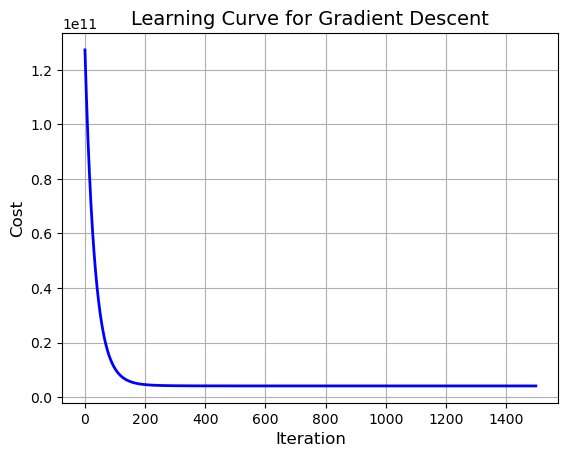

In [63]:
import matplotlib.pyplot as plt

# Plot the learning curve
plt.plot(range(iterations), J_history, color='b', linewidth=2)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.title('Learning Curve for Gradient Descent', fontsize=14)
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Finding the predictions on the basis of transformed x data using the weights calculated above after updation.

In [64]:
m = x_train.shape[0]
predicted = np.zeros(m)

#use vectorization to compute predicted values
#_________your code here_________
### START CODE HERE ###


predicted = w1 * X_transform[:,0] +w2 * X_transform[:,1] + b
### END CODE HERE ###

    

Now, finally plotting the 3D linear regression fit that shows scaled feature 1 and scaled feature 2 and the linear fit that is the predicted values. 

Iteration    0: Cost 14881620416.49   
Iteration  150: Cost 4493898007.92   
Iteration  300: Cost 4141542179.15   
Iteration  450: Cost 4094099930.66   
Iteration  600: Cost 4087594155.76   
Iteration  750: Cost 4086701917.33   
Iteration  900: Cost 4086579550.68   
Iteration 1050: Cost 4086562768.62   
Iteration 1200: Cost 4086560467.03   
Iteration 1350: Cost 4086560151.38   


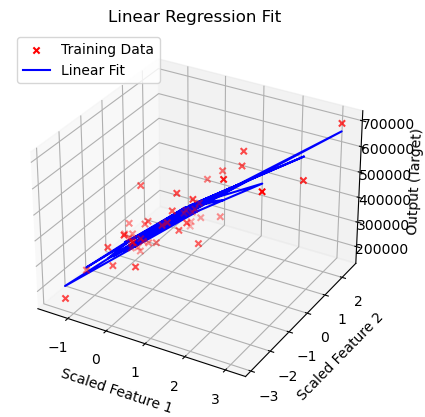

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Initialize weights randomly with values from a normal distribution
initial_w1 = np.random.normal(loc=0, scale=0.1)  # Adjust scale as needed
initial_w2 = np.random.normal(loc=0, scale=0.1)  # Adjust scale as needed

# Initialize bias close to zero or based on the mean/median of the output values
initial_b = np.mean(y_train)  # Initialize bias to the mean of the output values

# Initialize learning rate
alpha = 0.015

# Initialize number of iterations
num_iterations = 1500

# Initialize weight vector and bias
weight_vector = np.array([initial_w1, initial_w2])

# Perform gradient descent
w1, w2, b, J_history, _ = gradient_descent(X_transform, y_train, weight_vector[0], weight_vector[1], initial_b,
                                           compute_cost, compute_gradient, alpha, num_iterations)

# Initialize figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot training data
ax.scatter(X_transform[:, 0], X_transform[:, 1], y_train, c='r', marker='x', label='Training Data')

# Plot linear regression fit
ax.plot(X_transform[:, 0], X_transform[:, 1], predicted, c='b', label='Linear Fit')

# Set labels and title
ax.set_xlabel('Scaled Feature 1')
ax.set_ylabel('Scaled Feature 2')
ax.set_zlabel('Output (Target)')
ax.set_title('Linear Regression Fit')

# Add a legend
ax.legend(loc='upper left')

# Show the plot
plt.show()

A random example shown to predict a value. Since the input features were scaled before fitting the model, they will be scaled again before predicting the target value. 

In [70]:
# New input data point
new_input = np.array([[4215, 4]])

# Transform new input data point using the same StandardScaler object
new_input_transform = sc.transform(new_input)

# Predict output for new input data point
new_output = w1 * new_input_transform[0][0] + w2 * new_input_transform[0][1] + b

In [71]:
print(new_output)


641413.9988249715


A plot to show the actual values on the basis of input features vs predicted values

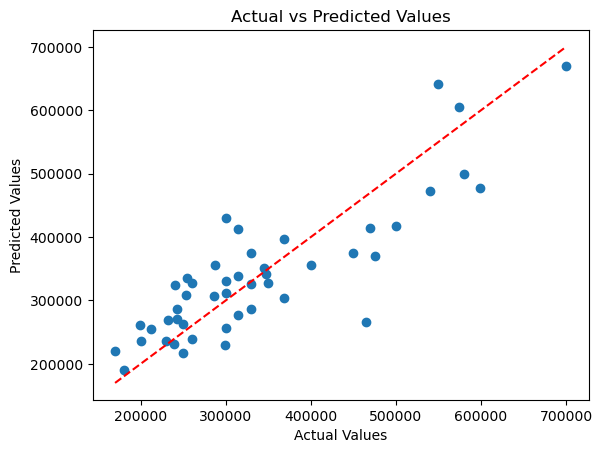

In [67]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.scatter(y_train, predicted)

# Add a diagonal line
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], c='r', linestyle='--')

# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Show the plot
plt.show()

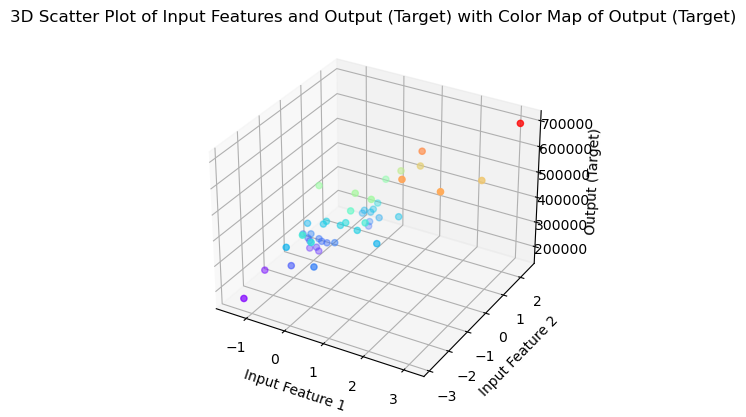

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 3D scatter plot with a color map of the output (target) variable
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_transform[:, 0], X_transform[:, 1], y_train, c=y_train, cmap='rainbow')

# Add labels and title
ax.set_xlabel('Input Feature 1')
ax.set_ylabel('Input Feature 2')
ax.set_zlabel('Output (Target)')
ax.set_title('3D Scatter Plot of Input Features and Output (Target) with Color Map of Output (Target)')

# Show the plot
plt.show()